In [35]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [36]:
file_path = '/content/LG.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [37]:
df

,Close,Open,High,Low
Date,,,,
2019-03-04,71200,70800,71800,70800
2019-03-05,71300,70900,72000,70300
2019-03-06,74400,72300,74600,72300
2019-03-07,75100,75200,76700,74200
2019-03-08,73700,75000,76100,73300
...,...,...,...,...
2024-05-21,96500,97000,97800,96000
2024-05-22,95300,96700,96900,95100
2024-05-23,95400,96000,97300,95400


In [38]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -2.009368546878018
p-value: 0.2824804859721475
Critical Values:
   1%: -3.43476120520139
   5%: -2.863488262178673
   10%: -2.567807233388883
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -2.0044297063010297
p-value: 0.28463421137984224
Critical Values:
   1%: -3.43476120520139
   5%: -2.863488262178673
   10%: -2.567807233388883
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -2.0642941576816356
p-value: 0.2591122667479344
Critical Values:
   1%: -3.4347701503050163
   5%: -2.8634922099733666
   10%: -2.5678093356353617
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -1.9524047126004813
p-value: 0.30782367456200704
Critical Values:
   1%: -3.4347641828771405
   5%: -2.863489576334964
   10%: -2.5678079331921446
==> Không phải chuỗi dừng



In [39]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 7:3
train, test = train_test_split(df, test_size=0.3, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [40]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -5.35267506207198
p-value: 4.2551908177449676e-06
Critical Values:
   1%: -3.4367023644255537
   5%: -2.864344690221488
   10%: -2.5682633351736674
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -5.303473543550386
p-value: 5.385661223180273e-06
Critical Values:
   1%: -3.4367023644255537
   5%: -2.864344690221488
   10%: -2.5682633351736674
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -5.401910678807701
p-value: 3.3560448755064334e-06
Critical Values:
   1%: -3.436714730058834
   5%: -2.8643501440982058
   10%: -2.5682662399849185
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -5.428497094273612
p-value: 2.9503445681672782e-06
Critical Values:
   1%: -3.4367085412302205
   5%: -2.8643474145110512
   10%: -2.568264786168072
==> Là chuỗi dừng



In [41]:
!pip install pmdarima

In [42]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Cột : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'bậc tối ưu cho cột:{column} là: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Cột : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19621.808, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19619.654, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19619.839, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19619.816, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19621.643, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.352 seconds
bậc tối ưu cho cột:Close là: (0, 0, 0) 


Cột : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19673.502, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19682.397, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19671.541, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19672.069, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19673.455, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19674.408, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept  

In [43]:

model = VARMAX(train_diff, order=(1, 0))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                 1053
Model:                                       VAR(1)   Log Likelihood              -36996.029
                                        + intercept   AIC                          74052.059
Date:                              Sun, 02 Jun 2024   BIC                          74200.841
Time:                                      16:42:24   HQIC                         74108.464
Sample:                                           0                                         
                                             - 1053                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     0.02, 168.99, 35.32, 25.54   Jarque-Bera (JB):   13983.80, 2781.10, 2838.76, 3521.25
Prob(Q):                    0.89, 0.00, 0.00, 0.00   P

In [44]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [45]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2022-10-28,46.971418,-545.943346,-451.601506,143.694759
2022-10-30,-13.480588,157.279455,190.126581,-152.184902
2022-10-31,17.691562,-49.267313,-65.678436,94.262161
2022-11-01,5.564519,30.654450,37.813273,-35.756706
2022-11-02,9.155653,-2.774668,-2.234664,26.806863
...,...,...,...,...
2024-05-21,8.548449,7.027510,8.453257,6.837776
2024-05-22,8.548449,7.027510,8.453257,6.837776
2024-05-23,8.548449,7.027510,8.453257,6.837776


In [46]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data.loc[index] = current_values

In [47]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)
r2 = r2_score(test, predicts_date)

print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

results_GBM = pd.DataFrame([['Gradient Boosting', mape, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_GBM

MAPE: 0.9999
RMSE: 103980.1211
MSE: 10811865592.8594
R²: -93.5706


,Model,MAE,MSE,RMSE,R2 Score
0,Gradient Boosting,0.99993,1.081187e+10,103980.121143,-93.570604


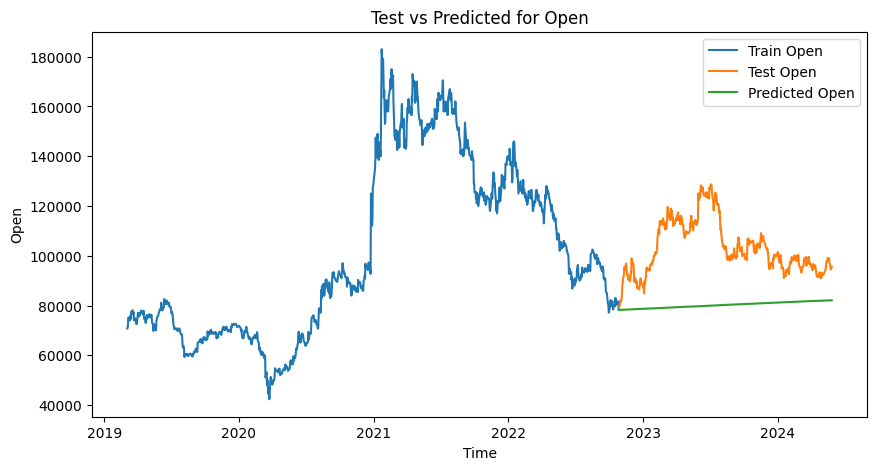

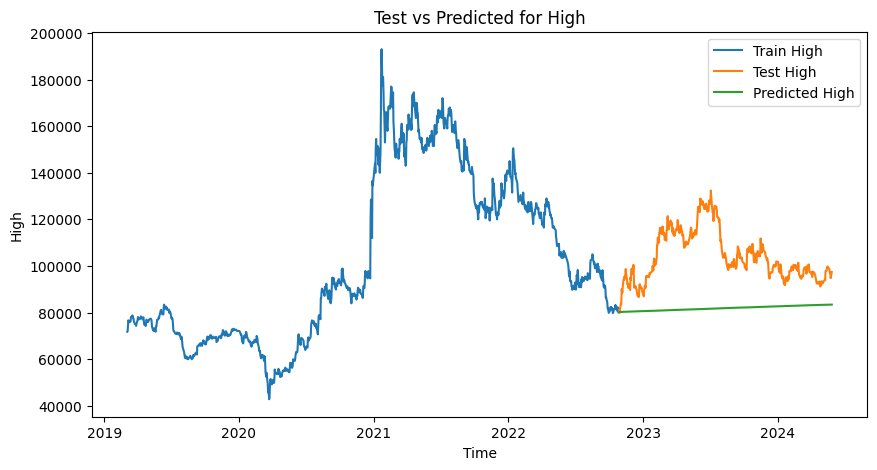

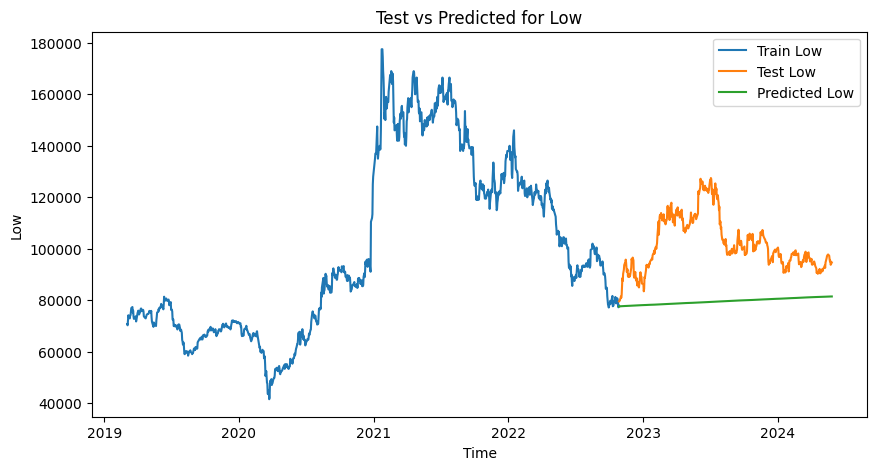

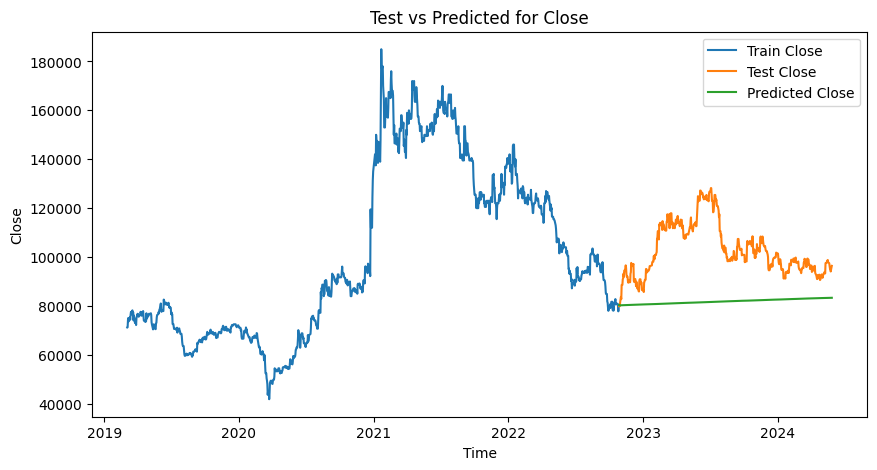

In [48]:
# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Open', 'High', 'Low', 'Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


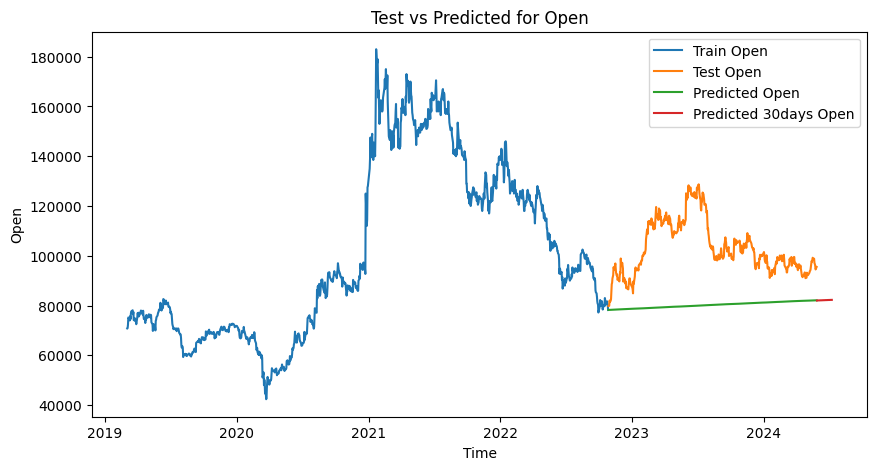

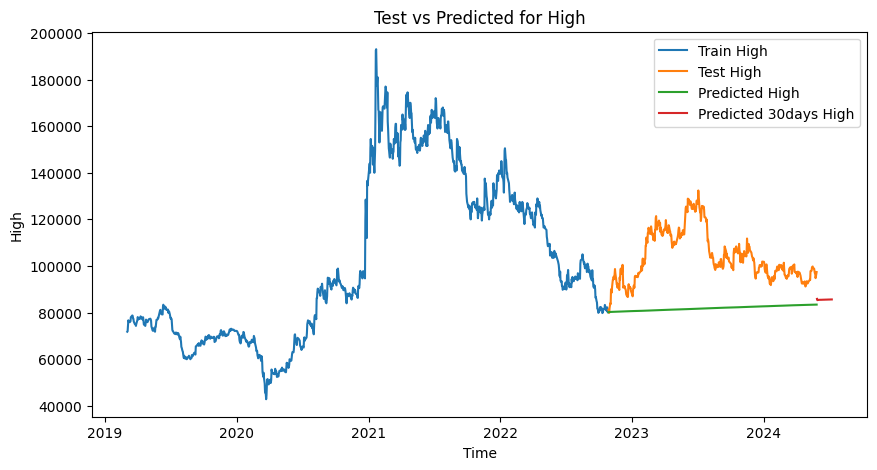

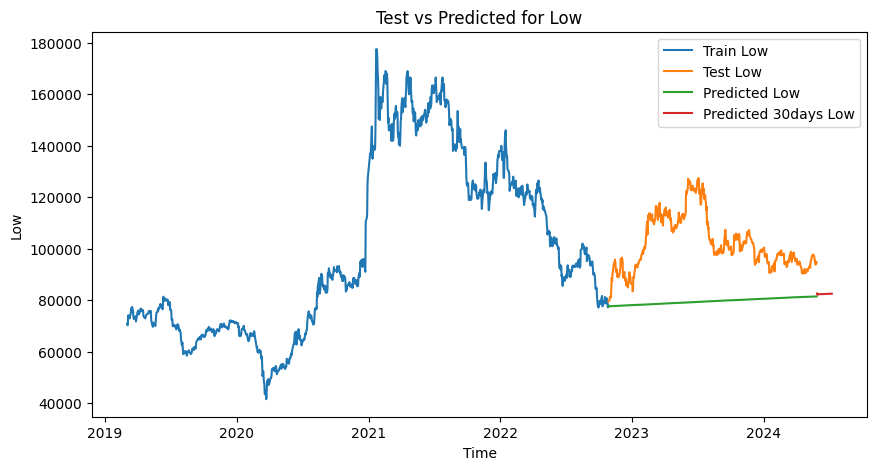

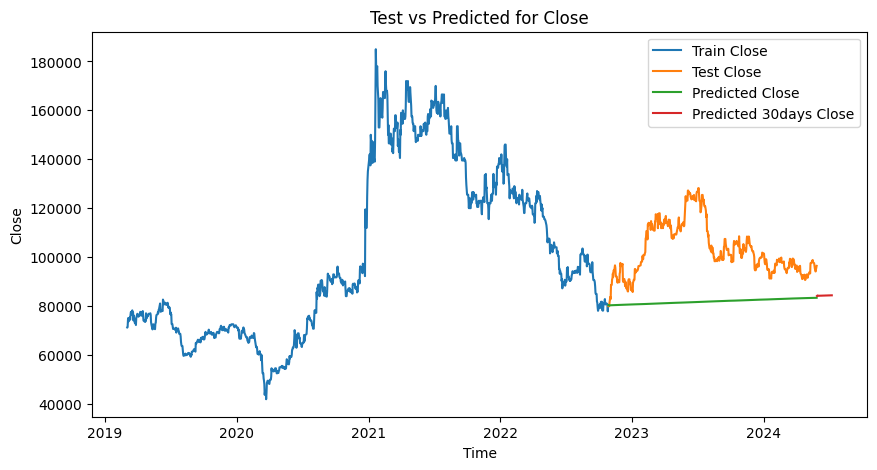

In [49]:

last_original_values_afterPredict = forecast_data.iloc[len(forecast_data) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_30days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 30 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
future_predict = results.get_forecast(steps=30)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_30days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Open', 'High', 'Low', 'Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_30days.index, forecast_data_30days[col], label=f'Predicted 30days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


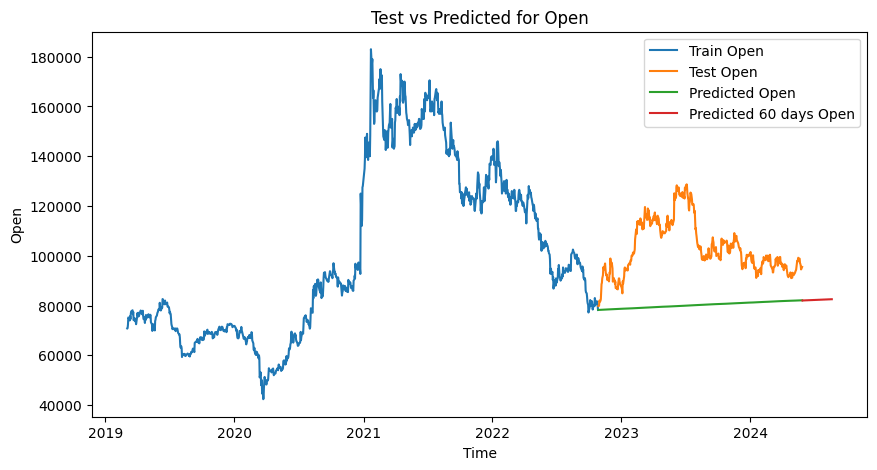

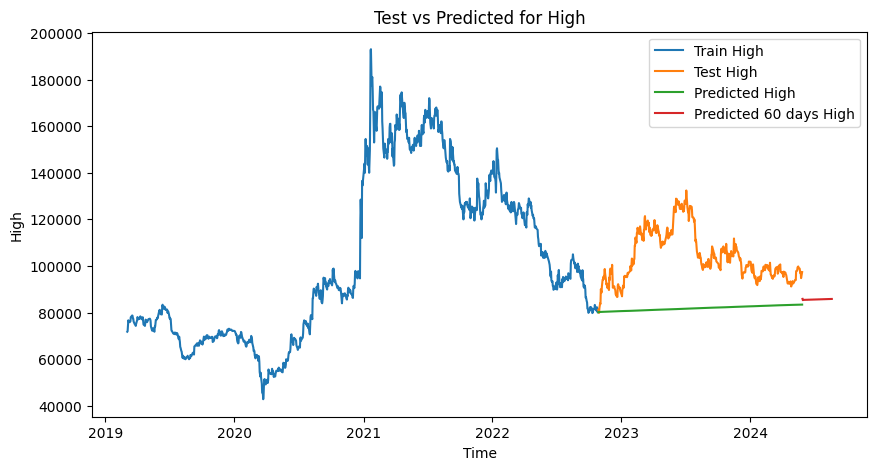

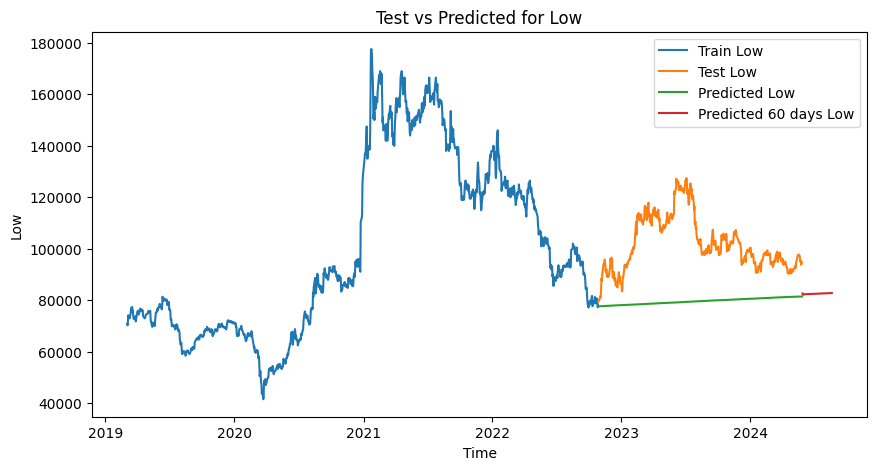

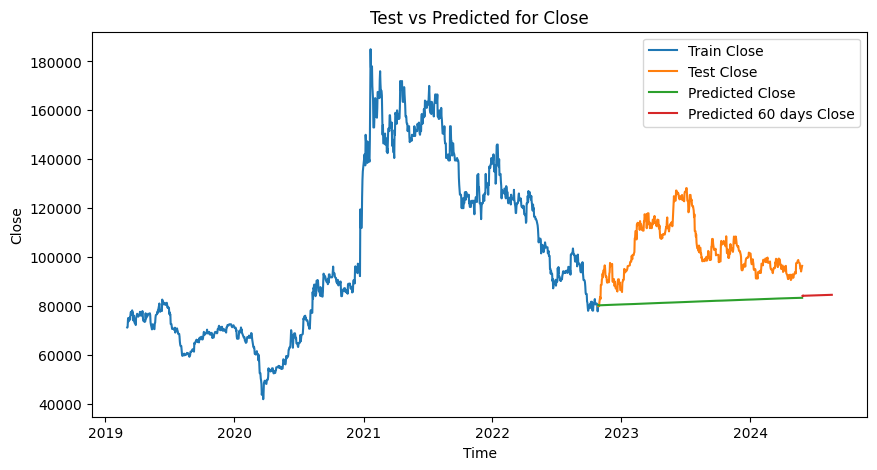

In [50]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_60days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 60 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=60, freq='B')
future_predict = results.get_forecast(steps=60)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_60days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Open', 'High', 'Low', 'Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_60days.index, forecast_data_60days[col], label=f'Predicted 60 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


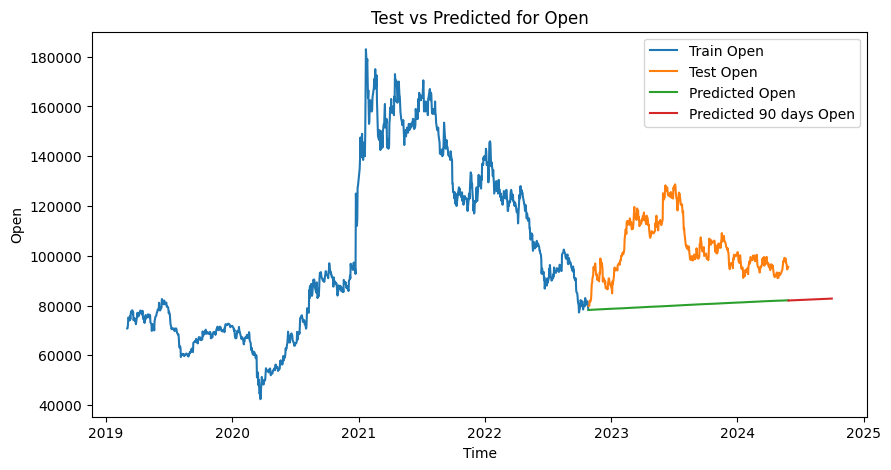

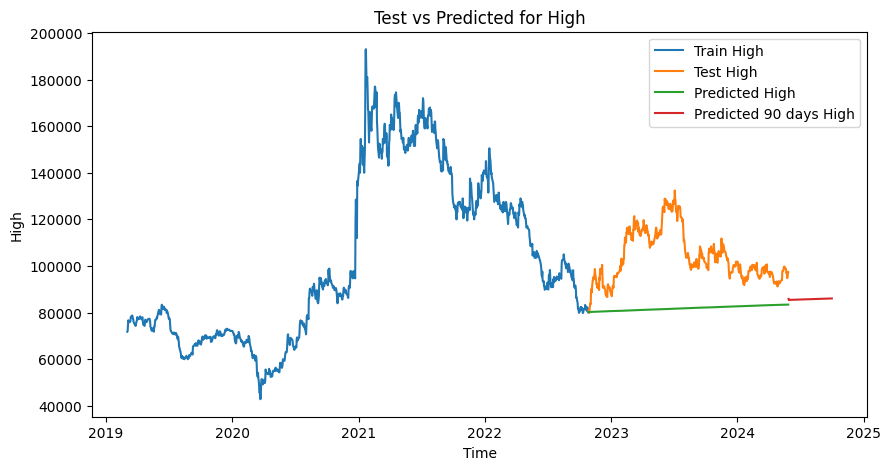

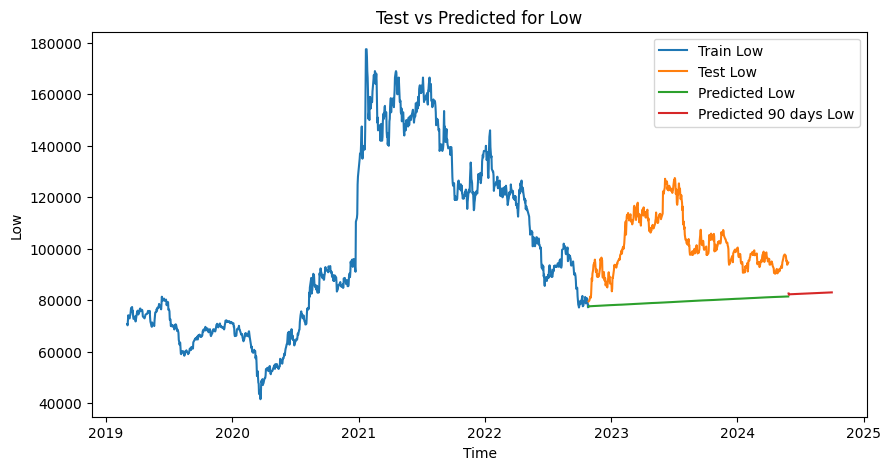

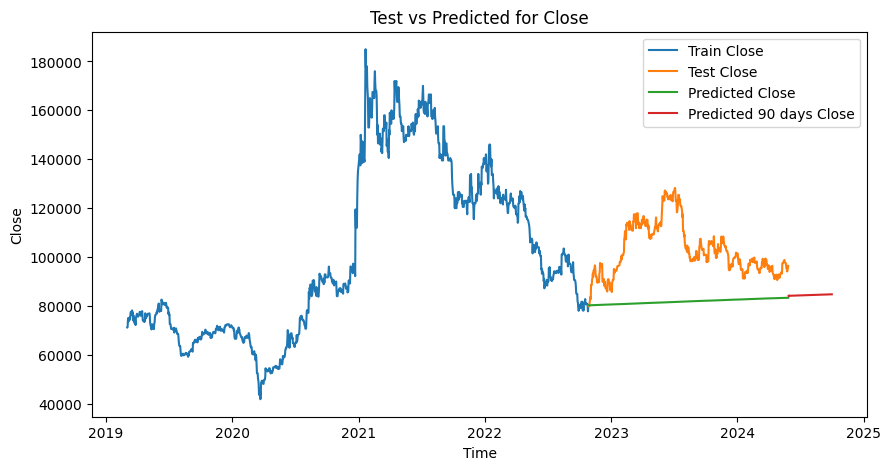

In [51]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_90days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 90 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=90, freq='B')
future_predict = results.get_forecast(steps=90)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_90days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Open', 'High', 'Low', 'Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_90days.index, forecast_data_90days[col], label=f'Predicted 90 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()